IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*

# TD-TME07: algorithmes d'apprentissage non-supervisé

L'objectif de cette séance est d'implémenter des algorithmes d'apprentissage non-supervisé (cf. cours 8), en particulier, l'algorithme de classification hiérarchique.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

GUERASSIMOV Alexandre - QIAN Christian

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>TD-TME07</tt> et rajouter à la suite de <tt>TD-TME07</tt> les noms des membres du binômes séparés par un tiret.


## Préparation

L'archive récupérée avec ce fichier contient aussi le répertoire <code>data</code> qui contient les bases pour expérimenter vos fonctions.

Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles :

In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

## Travail à réaliser

Le travail à faire se décompose en 2 phases :
- dans un premier temps, le travail porte sur la base d'apprentissage <code>base-2D.csv</code> qui contient des exemples décrits dans $R^2$. Ainsi, il est plus aisé de visualiser les résultats des fonctions à écrire ;
- dans un second temps, les fonctions écrites dans la phase précédente sont à utiliser avec la base d'apprentissage "base-Paris.csv".

**Attention**: vos fonctions doivent **dès leur création** pouvoir s'appliquer **quelle que soit la dimension** des exemples traités.

## Phase 1: implémentation des fonctions de base

### Chargement du fichier "base_2D.csv"

La lecture d'un fichier CSV par <code>pd.read()</code> fournit un <code>DataFrame</code> que vous avez appris à manipuler dans les séances précédentes.

In [3]:
# Par exemple:
data_2D = pd.read_csv("data/base-2D.csv")
print("Il y a", len(data_2D), "exemples dans la base.")

FileNotFoundError: [Errno 2] File b'data/base-2D.csv' does not exist: b'data/base-2D.csv'

<font size="+1" color="RED">**[Q]**</font> Exécuter le code suivant qui permet de réaliser une représentation graphique de cette base d'apprentissage.


In [ ]:
M_data2D= data_2D.values      # conversion du DataFrame en matrice pour la commande suivante
colonne_X= M_data2D[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= M_data2D[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)  # affichage des points

## Fonctions préliminaires

### Normalisation des données

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>normalisation</code> qui prend en argument un <code>DataFrame</code> et rend la matrice obtenue en normalisant chaque colonne de ce <code>DataFrame</code> en appliquant la normalisation vue en cours.


In [ ]:
M_data2D

In [ ]:
def normalisation(data):
    #res = data.copy()
    #col_X= data[0: , 0]
    #col_Y= data[0: , 1]
    #mix = min(col_X)
    #mx = max(col_X)
    #miy = min(col_Y)
    #my = max(col_Y)
    #res[0: ,0] = data[0: , 0] - mix
    #res[0: ,0] /= (mx - mix)
    #res[0: ,1] = data[0: , 1] - miy
    #res[0: ,1] /= (my - miy)
    return (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    #return res

n = normalisation(M_data2D) 
print(n)
reftest = np.array([[0.        , 0.6       ],\
       [0.14285714, 0.5       ],\
       [0.14285714, 0.        ],\
       [0.28571429, 0.        ],\
       [0.28571429, 0.2       ],\
       [0.57142857, 0.6       ],\
       [0.57142857, 0.8       ],\
       [0.57142857, 1.        ],\
       [0.64285714, 0.        ],\
       [0.64285714, 1.        ],\
       [0.71428571, 0.        ],\
       [0.71428571, 0.8       ],\
       [0.85714286, 0.2       ],\
       [1.        , 0.6       ]])
assert np.equal(n.all(), reftest.all())
print("colonne X :", min(colonne_X), max(colonne_X))
print("colonne Y :", min(colonne_Y), max(colonne_Y))

**[Q]** Normaliser les données de la base-2D et afficher leur représentation graphique: vérifier que le tracé est le même que celui obtenu avant la normalisation (aux valeurs des axes près).

In [ ]:
colonne_X= n[0: , 0]        # récupération des valeurs de la première colonne
colonne_Y= n[0: , 1]        # récupération des valeurs de la deuxième colonne
plt.scatter(colonne_X, colonne_Y)

### Distances entre exemples

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_euclidienne_vect</code> qui prend en argument deux exemples sous la forme de vecteurs et rend leur distance euclidienne. 

In [ ]:
def dist_euclidienne_vect(e1, e2):
    return np.sqrt(((e2 - e1)**2).sum())

In [ ]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= n[0,:]
v2= n[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

assert dist_euclidienne_vect(v1,v2) == 0.17437936593905287
print("distance euclidienne entre v1 et v2 : ", dist_euclidienne_vect(v1,v2))

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_manhattan_vect</code> qui prend en argument deux exemples et rend leur distance de Manhattan. 

In [ ]:
def dist_manhattan_vect(e1, e2):
    return np.abs(e2 - e1).sum()

In [ ]:
# Exemple d'utilisation sur les 2 premiers exemples de la base:
v1= n[0,:]
v2= n[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

assert dist_manhattan_vect(v1,v2) == 0.24285714285714283
print("distance de Manhattan entre v1 et v2 : ", dist_manhattan_vect(v1,v2))

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_vect</code> qui prend en argument une chaîne de caractères (soit la chaîne "euclidienne", soit "manhattan") ainsi que deux vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.

In [ ]:
def dist_vect(s, v1, v2):
    if s == "euclidienne":
        return dist_euclidienne_vect(v1, v2)
    elif s == "manhattan":
        return dist_manhattan_vect(v1, v2)
    

In [ ]:
v1= n[0,:]
v2= n[1,:]
print("v1 : ",v1, "\nv2 : ",v2)

for nom in ["euclidienne", "manhattan"] :
    print("distance ", nom, " entre v1 et v2 :\t", dist_vect(nom,v1,v2))


### Calcul de centroides

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>centroide</code> qui, étant donné une matrice représentant plusieurs exemples rend le centroide (calculé en faisant la moyenne de chaque composante des vecteurs de la matrice).
On fait l'hypothèse que la matrice contient toujours au moins un exemple.

In [ ]:
def centroide(m):
    if isinstance(m,list):
        return m[0]
    #res = np.zeros(2)
    s = np.sum(m, axis=0)
    #sx = m[0: ,0].sum()
    #sy = m[0: ,1].sum()
    #res[0] = (sx / m.shape[0])
    #res[1] = (sy / m.shape[0])
    return s / m.shape[0]
    #return res

In [ ]:
n

In [ ]:
assert np.equal(centroide(n).all(),np.array([0.51020408, 0.45      ]).all())
centroide(n)

### Distances entre groupes d'exemples


La distance entre deux groupes d'exemples correspond à la distance entre leurs centroïdes (approche "centroid linkage").

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_groupes</code> qui prend en argument une chaîne de caractères (soit "euclidienne", soit "manhattan") ainsi que deux groupes de vecteurs et qui rend leur distance soit euclidienne, soit de Manhattan selon le cas.


In [ ]:
def dist_groupes(s, gv1, gv2):
    cv1 = centroide(gv1)
    cv2 = centroide(gv2)
    if s == "euclidienne":
        return dist_euclidienne_vect(cv1, cv2)
    elif s == "manhattan":
        return dist_manhattan_vect(cv1, cv2)

In [ ]:
# par exemple :
print(n[0:4])
dist_groupes("euclidienne", n[0:4], n[5:13])

## L'algorithme de classification hiérarchique

Dans la suite de cet exercice, une partition (qui est un groupe de clusters) est représentée par une structure de données de type dictionnaire (<code>dict()</code> en python) :
- la clé est un numéro de cluster (sous la forme d'un entier naturel) ;
- la valeur associée est une matrice contenant les exemples qui sont dans le cluster correspondant.

On appelle "partition" un tel dictionnaire.


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>initialise</code> qui, étant donné une matrice M d'exemples, rend un dictionnaire contenant autant d'entrées que d'exemples dans M. Dans ce dictionnaire, une clé est numéro d'exemple (un entier compris entre 0 et n-1, le nombre d'exemples) et la valeur associée est une matrice d'exemples contenant un exemple de M.

In [ ]:
def initialise(M):
    dico = dict()
    for i in range(M.shape[0]):
        dico[i] = [M[i]]
    return dico

In [ ]:
# Par exemple:
depart = initialise(n)
# cette partition contient autant de clusters que d'exemples: on a un cluster par exemple.
depart 

### Variante 1: chaînage par centroides

On souhaite implémenter ici l'algorithme de classification hiérarchique basé sur l'utilisation d'un chaînage par centroides (approche "centroid linkage").

On commence par implémenter une fonction qui, étant donné une partition, permet de regrouper les 2 clusters les plus proches. Ces 2 clusters sont alors fusionnés pour n'en former qu'un seul qui est ajouté à la partition, alors que les 2 clusters initiaux sont retirés de la partition.
On fait l'hypothèse que la partition initiale contient au moins 2 groupes.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>fusionne</code> qui prend en argument un nom de distance ("euclidienne" ou "manhattan") et une partition C0 et qui rend 4 valeurs :
- la partition C1 obtenue après fusion des 2 clusters les plus proches ;
- les clés des 2 clusters de C0 qui ont été fusionnés et qui ont donc aussi été retirés de C1 ;
- la distance qui séparait ces 2 clusters, calculée selon le nom de distance donné.

In [ ]:
def fusionne(s, dic):
    k = list(dic.keys())
    res = dic
    c1 = 0
    c2 = 0
    d = 10000000000
    for i in dic.keys():
        for j in dic.keys():
            if i == j:
                continue
            db = dist_groupes(s, dic[i], dic[j])
            if db < d:
                #print("db ", db, "dic i ", dic[i], "dic j ", dic[j])
                c1 = i
                c2 = j
                d = db
    print("Fusion de ",c1," et ",c2,"pour une distance de ",d)
    m = max(dic.keys())+1
    # l = res.pop(c1) + res.pop(c2)
    #l = res[c1] + res[c2]
    #print("test res c1 ",res[c1],"test res c2 ",res[c2])
    l = np.concatenate([res[c1], res[c2]])
    del res[c1]
    del res[c2]
    res[m] = l
    #print(res)
    return (res, c1, c2, d)

In [ ]:
# Par exemple:
depart = initialise(n)

fusionne("euclidienne",depart)

### Construction de dendrogramme

Le dendrogramme permet de visualiser les fusions de clusters réalisés tout au long du déroulement de l'algorithme de clustering hiérarchique.

Pour construire un dendrogramme, il est nécessaire de construire la matrice suivante (que l'on appelle <code>M_Fusion</code> dans ce qui suit): pour chaque ligne, cette matrice contient 4 colonnes :
- les 2 premières colonnes contiennent les clés des groupes fusionnés ;
- la 3e colonne contient la distance qui séparait ces 2 groupes ;
- la 4e colonne contient la valeur 2 (c'est une valeur sans importance pour nous).
 

In [ ]:
# Exemple de construction de la matrice M_Fusion en utilisant les fonctions écrites
# dans les questions précédentes

# initialisation 
courant = initialise(n)       # clustering courant, au départ:s données data_2D normalisées
M_Fusion = []                        # initialisation
while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
    new,k1,k2,dist_min = fusionne('euclidienne',courant)
    if(len(M_Fusion)==0):
        M_Fusion = [k1,k2,dist_min,2]
    else:
        M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
    courant = new
    
print('\nLa matrice M_Fusion obtenue :\n',M_Fusion)

Une fois la matrice <code>M_Fusion</code> construite, le tracé d'un histogramme s'effectue avec le code suivant :

In [ ]:
import scipy.cluster.hierarchy

# Paramètre de la fenêtre d'affichage: 
plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
plt.title('Dendrogramme', fontsize=25)    
plt.xlabel('Exemple', fontsize=25)
plt.ylabel('Distance', fontsize=25)

# Construction du dendrogramme à partir de la matrice M_Fusion:
scipy.cluster.hierarchy.dendrogram(
    M_Fusion,
    leaf_font_size=18.,  # taille des caractères de l'axe des X
)

# Affichage du résultat obtenu:
plt.show()

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>clustering_hierarchique</code> qui, pour une base d'apprentissage et un nom de distance donné, permet de réaliser un clustering hiérarchique et de tracer le dendrogramme obtenu.

La fonction rend la matrice <code>M_Fusion</code> construite.

In [ ]:
import scipy.cluster.hierarchy

def clustering_hierarchique(train, s):
    courant = initialise(train)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_min = fusionne(s,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_min,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_min,2] ])
        courant = new
        
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )
    plt.show()
    return M_Fusion

### Comparaison de distances

<font size="+1" color="RED">**[Q]**</font> Réaliser un clustering en utilisant la distance de Manhattan. Comparer les résultats obtenus avec cette distance avec ceux obtenus avec la distance euclidienne. Est-ce que l'utilisation de cette distance vous semble pertinent?

In [ ]:
clustering_hierarchique(n, "manhattan")

On remarque que la distance de manhattan 

### Variante 2: chaînage complet (maximum des distances)

On considère maintenant l'approche "complete linkage". 

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <code>dist_max_groupes</code> qui, étant donné deux clusters, calcule leur distance ainsi définie. Cette fonction prend 3 arguments: un nom de distance à utiliser ("euclidienne" ou "manhattan") et deux clusters.
On fait l'hypothèse que les 2 clusters contiennent au moins un exemple.


In [ ]:
def dist_max_groupes(s, c1, c2):
    res = []
    if s == "euclidienne":
        for e in c1:
            for f in c2:
                if np.array_equal(e,f):
                    continue
                res.append(dist_euclidienne_vect(e,f))
        return max(res)
    elif s == "manhattan":
        for e in c1:
            for f in c2:
                if np.array_equal(e,f):
                    continue
                res.append(dist_manhattan_vect(e,f))
        return max(res)
    

In [ ]:
dist_max_groupes("euclidienne", n[0:5], n[6:13])

La distance <code>dist_max_groupes</code> est utilisée lors d'un clustering hiérarchique basé sur un chaînage complet.

<font size="+1" color="RED">**[Q]**</font> Implémenter une variante du clustering hiérarchique qui utilise cette distance.

In [ ]:
def fusionne_max(s, dic):
    k = dic.keys()
    res = dic
    c1 = 0
    c2 = 0
    d = 0
    for i in k:
        for j in k:
            if i == j:
                continue
            db = dist_max_groupes(s, dic[i], dic[j])
            if db > d:
                c1 = i
                c2 = j
                d = db
    print("Fusion de ",c1," et ",c2,"pour une distance de ",d)
    m = max(k)+1
    l = np.concatenate([res[c1], res[c2]])
    del res[c1]
    del res[c2]
    res[m] = l
    return (res, c1, c2, d)

In [ ]:
depart = initialise(n)
fusionne_max("euclidienne",depart)

In [ ]:
def clustering_hierarchique_max(train, s):
    courant = initialise(train)       # clustering courant, au départ:s données data_2D normalisées
    M_Fusion = []                        # initialisation
    while len(courant) >=2:              # tant qu'il y a 2 groupes à fusionner
        new,k1,k2,dist_max = fusionne_max(s,courant)
        if(len(M_Fusion)==0):
            M_Fusion = [k1,k2,dist_max,2]
        else:
            M_Fusion = np.vstack( [M_Fusion,[k1,k2,dist_max,2] ])
        courant = new
        
    plt.figure(figsize=(30, 15)) # taille : largeur x hauteur
    plt.title('Dendrogramme', fontsize=25)    
    plt.xlabel('Exemple', fontsize=25)
    plt.ylabel('Distance', fontsize=25)

    # Construction du dendrogramme à partir de la matrice M_Fusion:
    scipy.cluster.hierarchy.dendrogram(
        M_Fusion,
        leaf_font_size=18.,  # taille des caractères de l'axe des X
    )
    plt.show()
    return M_Fusion

In [ ]:
clustering_hierarchique_max(n,'euclidienne')

## Phase 2 : application à des données réelles

### Données: traitement des déchets de la ville de Paris

Récupérer les données concernant le traitement des déchets de la ville de Paris :
http://opendata.paris.fr/explore/dataset/tonnages_des_dechets_bacs_jaunes/table/

**Attention**: il faut certainement préparer cette base afin de pouvoir appliquer l'algorithme de clustering: en particulier, certaines colonnes (Granularité, Total...) ne sont pas à utilisables dans le calcul des distances, il faut donc les éliminer. Il faut aussi prévoir de conserver le nom de l'arrondissement afin de pouvoir à la fin analyser le résultat du clustering.

Sauvegarder ces données, prêtes à être traitées par l'algorithme de clustering, au format CSV dans le répertoire <pre>data/</pre> sous le nom <pre>base-Paris.csv</pre>

<font size="+1" color="RED">**[Q]**</font> Etudier cette base et les clusters qui peuvent être mis en évidence.


In [ ]:
data_Paris = pd.read_csv("data/base-Paris.csv", sep=";")

In [ ]:
data_Paris.head(-1)

In [ ]:
data_Paris = data_Paris.iloc[:, 1:-1]
data_Paris

<font size="+1" color="RED">**[Q]**</font> Préparer un rapport d'analyse (c'est-à-dire, compléter votre notebook en rajoutant à la suite tout un ensemble d'expérimentations et de résultats obtenus sur la base) réalisé sur cette base qui mette en évidence les clusters existants à différents niveaux de distance, et en utilisant différentes distances.


In [ ]:
data_Paris = data_Paris.stack().str.replace(' ','').unstack()
data_Paris = data_Paris.stack().str.replace(',','.').unstack()
#data_Paris
parisVal = data_Paris.values.astype(float)
parisVal

In [37]:
normalisation(parisVal)

array([[0.03014634, 0.02947424, 0.03122398, 0.0297555 , 0.03296094,
        0.03095408, 0.03110851, 0.0238923 , 0.028501  , 0.02976216,
        0.03191298, 0.02994456],
       [0.07383587, 0.07494299, 0.07350058, 0.07565445, 0.08043763,
        0.07290802, 0.07810395, 0.08027591, 0.07233271, 0.07133787,
        0.07122988, 0.07045065],
       [0.05506524, 0.05380963, 0.05292632, 0.05467554, 0.05106711,
        0.05349735, 0.05760836, 0.05405355, 0.05176712, 0.05287563,
        0.05359886, 0.05465557],
       [0.1172704 , 0.11574146, 0.11634122, 0.11762744, 0.12372294,
        0.11680732, 0.09264398, 0.11435757, 0.11602593, 0.11456862,
        0.11485075, 0.11555633],
       [0.05323776, 0.0549811 , 0.05645833, 0.05505449, 0.04464134,
        0.05355457, 0.05705662, 0.05102079, 0.04721084, 0.05361754,
        0.05664346, 0.05859422],
       [0.04982363, 0.05215395, 0.05156993, 0.05463006, 0.05923415,
        0.05501359, 0.05843597, 0.05647607, 0.053886  , 0.05388863,
        0.05711399,

Fusion de  13  et  14 pour une distance de  23588.743873932755
Fusion de  8  et  21 pour une distance de  23408.17998243349
Fusion de  7  et  22 pour une distance de  23367.182456385282
Fusion de  19  et  23 pour une distance de  23176.503763510147
Fusion de  16  et  24 pour une distance de  23158.881562588464
Fusion de  20  et  25 pour une distance de  23125.172831786578
Fusion de  15  et  26 pour une distance de  23065.451537093308
Fusion de  9  et  27 pour une distance de  23026.174960900476
Fusion de  17  et  28 pour une distance de  22900.33852260704
Fusion de  0  et  29 pour une distance de  22877.530096144557
Fusion de  6  et  30 pour une distance de  22684.151417895268
Fusion de  12  et  31 pour une distance de  22539.803159743875
Fusion de  4  et  32 pour une distance de  22322.977380940923
Fusion de  2  et  33 pour une distance de  22321.379141755555
Fusion de  5  et  34 pour une distance de  22306.23996306863
Fusion de  18  et  35 pour une distance de  22248.76877042862
Fusi

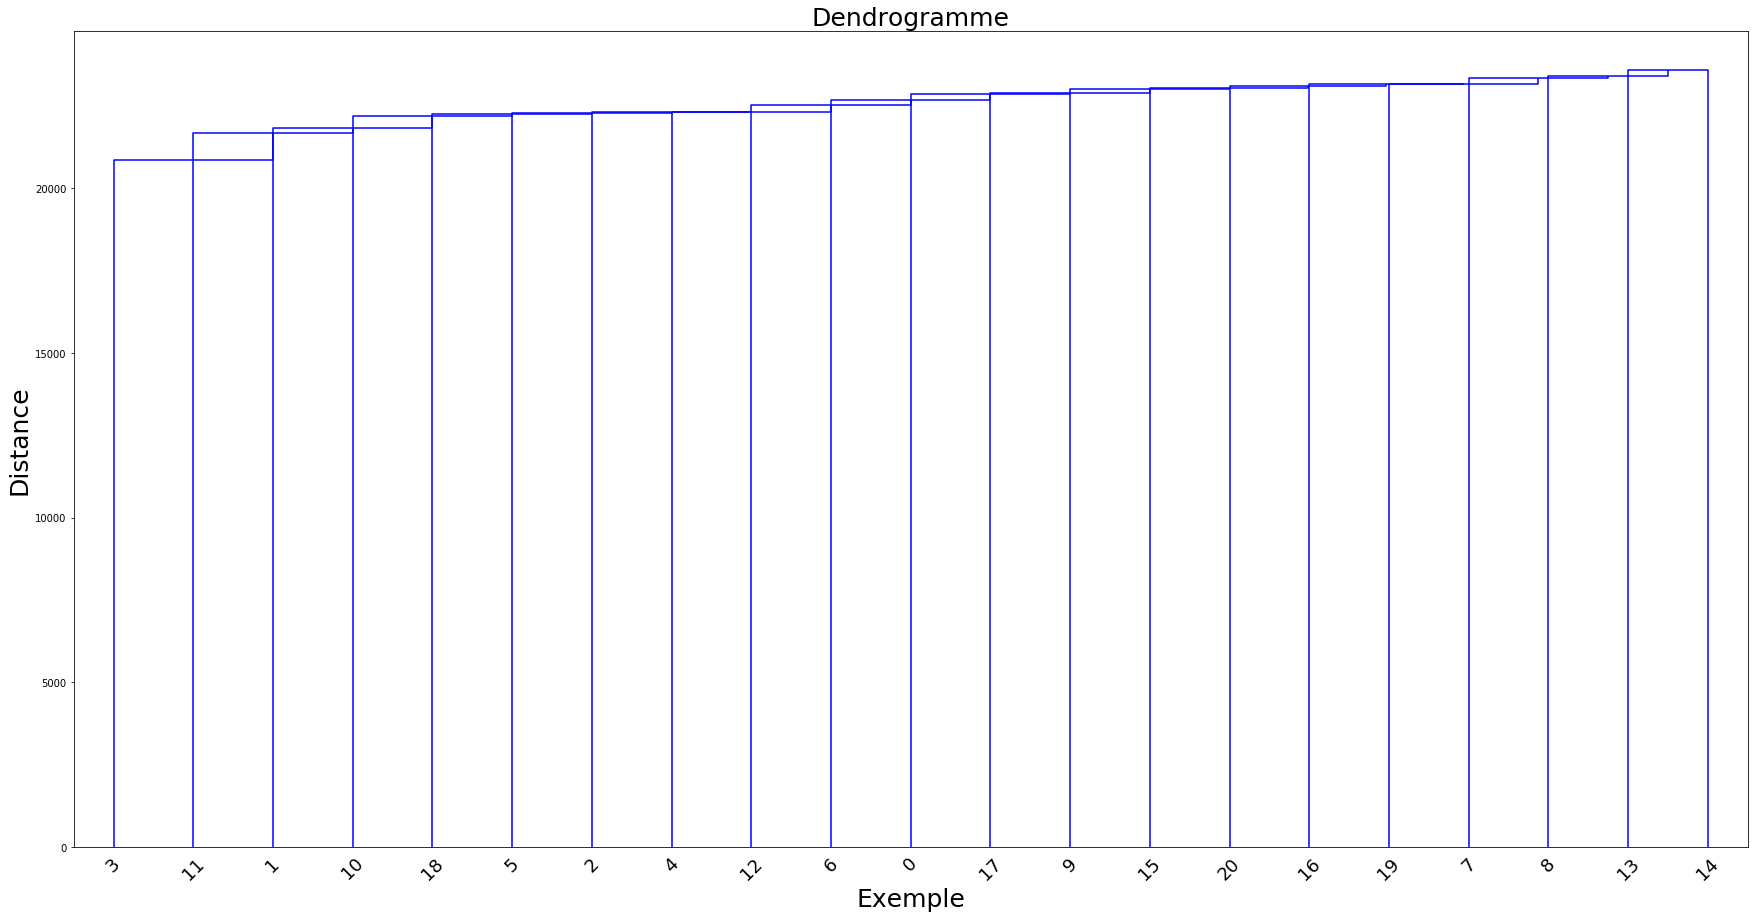

array([[1.30000000e+01, 1.40000000e+01, 2.35887439e+04, 2.00000000e+00],
       [8.00000000e+00, 2.10000000e+01, 2.34081800e+04, 2.00000000e+00],
       [7.00000000e+00, 2.20000000e+01, 2.33671825e+04, 2.00000000e+00],
       [1.90000000e+01, 2.30000000e+01, 2.31765038e+04, 2.00000000e+00],
       [1.60000000e+01, 2.40000000e+01, 2.31588816e+04, 2.00000000e+00],
       [2.00000000e+01, 2.50000000e+01, 2.31251728e+04, 2.00000000e+00],
       [1.50000000e+01, 2.60000000e+01, 2.30654515e+04, 2.00000000e+00],
       [9.00000000e+00, 2.70000000e+01, 2.30261750e+04, 2.00000000e+00],
       [1.70000000e+01, 2.80000000e+01, 2.29003385e+04, 2.00000000e+00],
       [0.00000000e+00, 2.90000000e+01, 2.28775301e+04, 2.00000000e+00],
       [6.00000000e+00, 3.00000000e+01, 2.26841514e+04, 2.00000000e+00],
       [1.20000000e+01, 3.10000000e+01, 2.25398032e+04, 2.00000000e+00],
       [4.00000000e+00, 3.20000000e+01, 2.23229774e+04, 2.00000000e+00],
       [2.00000000e+00, 3.30000000e+01, 2.23213791e

In [38]:
clustering_hierarchique_max(parisVal, "euclidienne")

Fusion de  13  et  14 pour une distance de  81424.09999999999
Fusion de  8  et  21 pour une distance de  80799.1
Fusion de  7  et  22 pour une distance de  80654.3
Fusion de  19  et  23 pour une distance de  79994.79999999999
Fusion de  16  et  24 pour une distance de  79943.7
Fusion de  20  et  25 pour une distance de  79824.4
Fusion de  15  et  26 pour une distance de  79619.9
Fusion de  9  et  27 pour une distance de  79482.5
Fusion de  17  et  28 pour une distance de  79045.3
Fusion de  0  et  29 pour une distance de  78975.6
Fusion de  6  et  30 pour une distance de  78295.09999999999
Fusion de  12  et  31 pour une distance de  77806.40000000001
Fusion de  4  et  32 pour une distance de  77060.70000000001
Fusion de  2  et  33 pour une distance de  77046.5
Fusion de  5  et  34 pour une distance de  76988.29999999999
Fusion de  18  et  35 pour une distance de  76799.79999999999
Fusion de  10  et  36 pour une distance de  76596.70000000001
Fusion de  1  et  37 pour une distance de  7

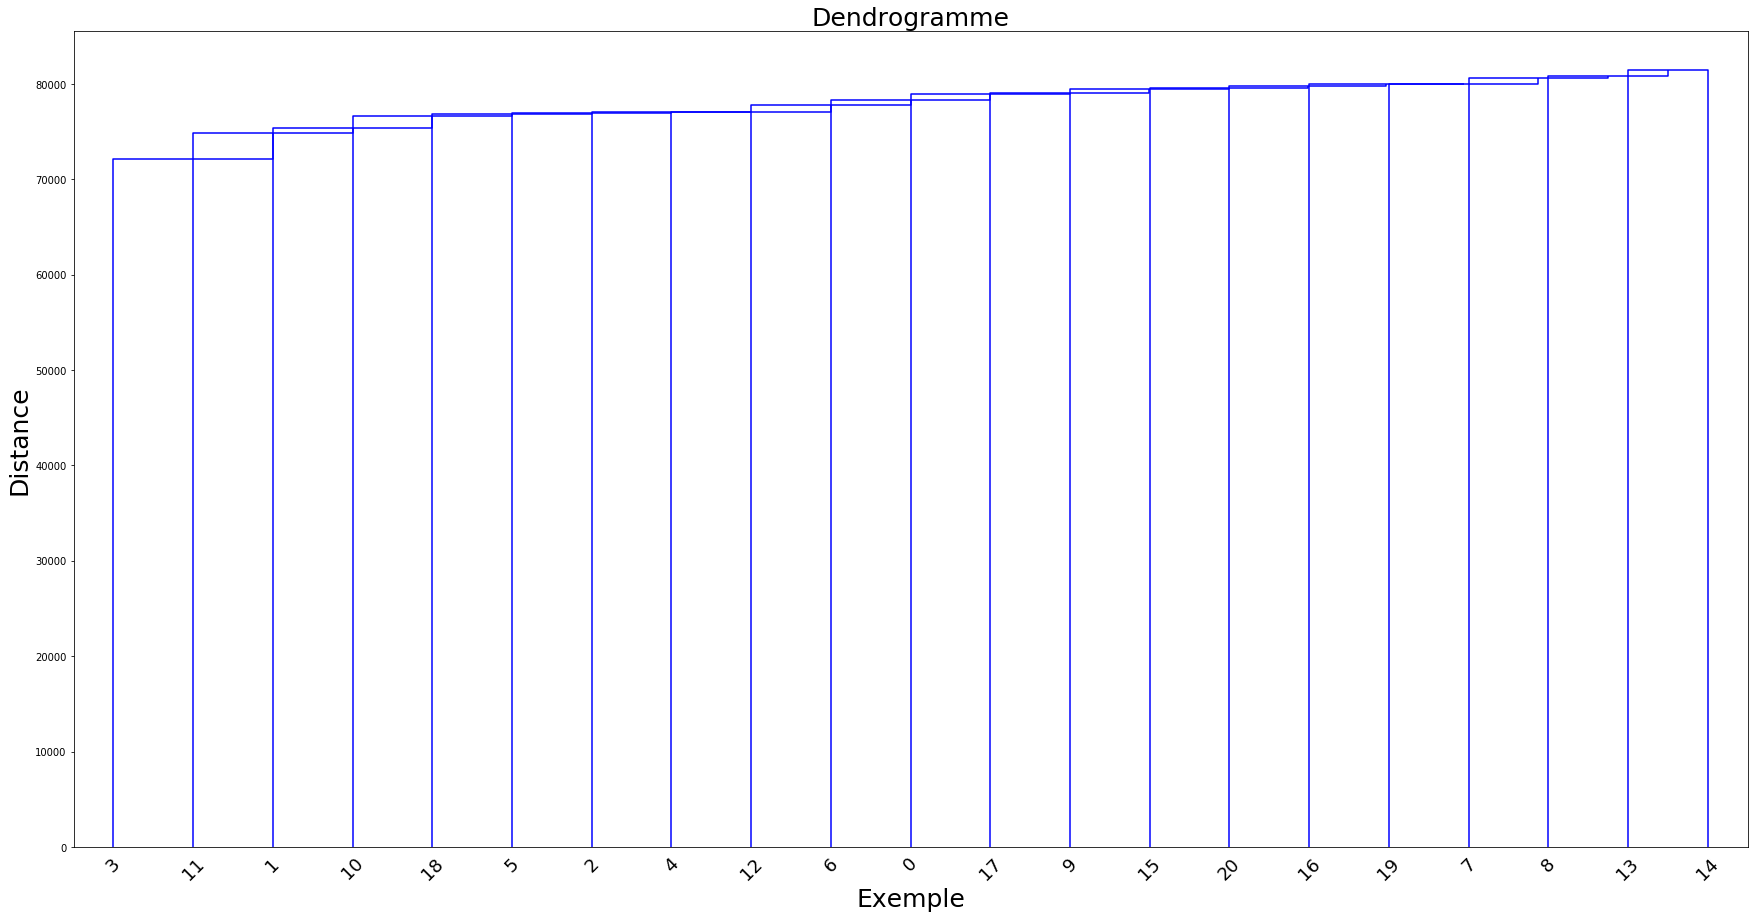

array([[1.30000e+01, 1.40000e+01, 8.14241e+04, 2.00000e+00],
       [8.00000e+00, 2.10000e+01, 8.07991e+04, 2.00000e+00],
       [7.00000e+00, 2.20000e+01, 8.06543e+04, 2.00000e+00],
       [1.90000e+01, 2.30000e+01, 7.99948e+04, 2.00000e+00],
       [1.60000e+01, 2.40000e+01, 7.99437e+04, 2.00000e+00],
       [2.00000e+01, 2.50000e+01, 7.98244e+04, 2.00000e+00],
       [1.50000e+01, 2.60000e+01, 7.96199e+04, 2.00000e+00],
       [9.00000e+00, 2.70000e+01, 7.94825e+04, 2.00000e+00],
       [1.70000e+01, 2.80000e+01, 7.90453e+04, 2.00000e+00],
       [0.00000e+00, 2.90000e+01, 7.89756e+04, 2.00000e+00],
       [6.00000e+00, 3.00000e+01, 7.82951e+04, 2.00000e+00],
       [1.20000e+01, 3.10000e+01, 7.78064e+04, 2.00000e+00],
       [4.00000e+00, 3.20000e+01, 7.70607e+04, 2.00000e+00],
       [2.00000e+00, 3.30000e+01, 7.70465e+04, 2.00000e+00],
       [5.00000e+00, 3.40000e+01, 7.69883e+04, 2.00000e+00],
       [1.80000e+01, 3.50000e+01, 7.67998e+04, 2.00000e+00],
       [1.00000e+01, 3.6

In [39]:
clustering_hierarchique_max(parisVal, "manhattan")

Fusion de  0  et  17 pour une distance de  44.421278684882544
Fusion de  7  et  8 pour une distance de  53.78605767296949
Fusion de  16  et  19 pour une distance de  70.04291541619322
Fusion de  2  et  4 pour une distance de  73.39114387989875
Fusion de  20  et  23 pour une distance de  74.79112581048638
Fusion de  15  et  25 pour une distance de  98.26018748427282
Fusion de  5  et  24 pour une distance de  98.81181609503994
Fusion de  18  et  27 pour une distance de  119.07484574371233
Fusion de  9  et  26 pour une distance de  126.98828193971285
Fusion de  10  et  28 pour une distance de  128.662526109975
Fusion de  6  et  12 pour une distance de  191.0043716777184
Fusion de  14  et  22 pour une distance de  201.9366856220038
Fusion de  1  et  11 pour une distance de  220.42381903959472
Fusion de  21  et  29 pour une distance de  226.70057719379545
Fusion de  30  et  31 pour une distance de  336.11182172009353
Fusion de  32  et  34 pour une distance de  408.19415967828945
Fusion de  

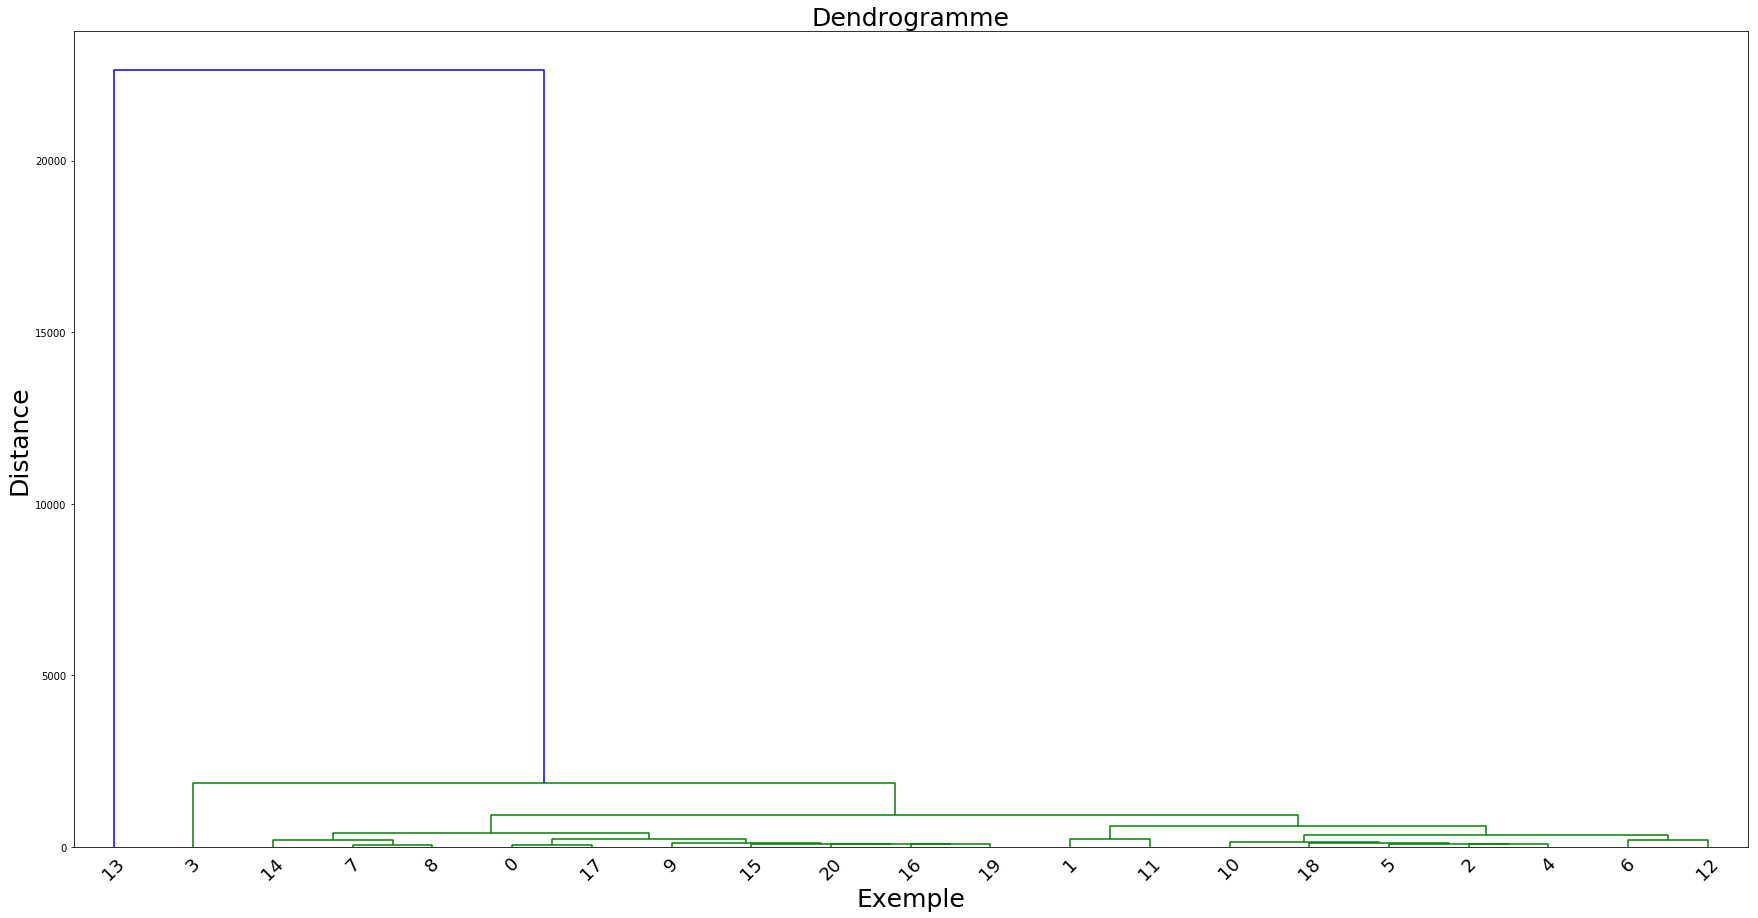

array([[0.00000000e+00, 1.70000000e+01, 4.44212787e+01, 2.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 5.37860577e+01, 2.00000000e+00],
       [1.60000000e+01, 1.90000000e+01, 7.00429154e+01, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 7.33911439e+01, 2.00000000e+00],
       [2.00000000e+01, 2.30000000e+01, 7.47911258e+01, 2.00000000e+00],
       [1.50000000e+01, 2.50000000e+01, 9.82601875e+01, 2.00000000e+00],
       [5.00000000e+00, 2.40000000e+01, 9.88118161e+01, 2.00000000e+00],
       [1.80000000e+01, 2.70000000e+01, 1.19074846e+02, 2.00000000e+00],
       [9.00000000e+00, 2.60000000e+01, 1.26988282e+02, 2.00000000e+00],
       [1.00000000e+01, 2.80000000e+01, 1.28662526e+02, 2.00000000e+00],
       [6.00000000e+00, 1.20000000e+01, 1.91004372e+02, 2.00000000e+00],
       [1.40000000e+01, 2.20000000e+01, 2.01936686e+02, 2.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 2.20423819e+02, 2.00000000e+00],
       [2.10000000e+01, 2.90000000e+01, 2.26700577e

In [323]:
clustering_hierarchique(parisVal, "euclidienne")

Fusion de  0  et  17 pour une distance de  119.1
Fusion de  7  et  8 pour une distance de  152.59999999999997
Fusion de  2  et  4 pour une distance de  200.39999999999992
Fusion de  16  et  20 pour une distance de  203.3
Fusion de  19  et  24 pour une distance de  215.54999999999993
Fusion de  5  et  23 pour une distance de  260.70000000000005
Fusion de  9  et  15 pour une distance de  271.2
Fusion de  18  et  26 pour une distance de  328.6333333333334
Fusion de  25  et  27 pour une distance de  369.76666666666665
Fusion de  10  et  28 pour une distance de  419.7249999999999
Fusion de  6  et  12 pour une distance de  615.4999999999999
Fusion de  1  et  11 pour une distance de  689.8
Fusion de  14  et  22 pour une distance de  697.4
Fusion de  21  et  29 pour une distance de  762.61
Fusion de  30  et  31 pour une distance de  1152.35
Fusion de  33  et  34 pour une distance de  1403.9952380952382
Fusion de  32  et  35 pour une distance de  2100.042857142857
Fusion de  36  et  37 pour une

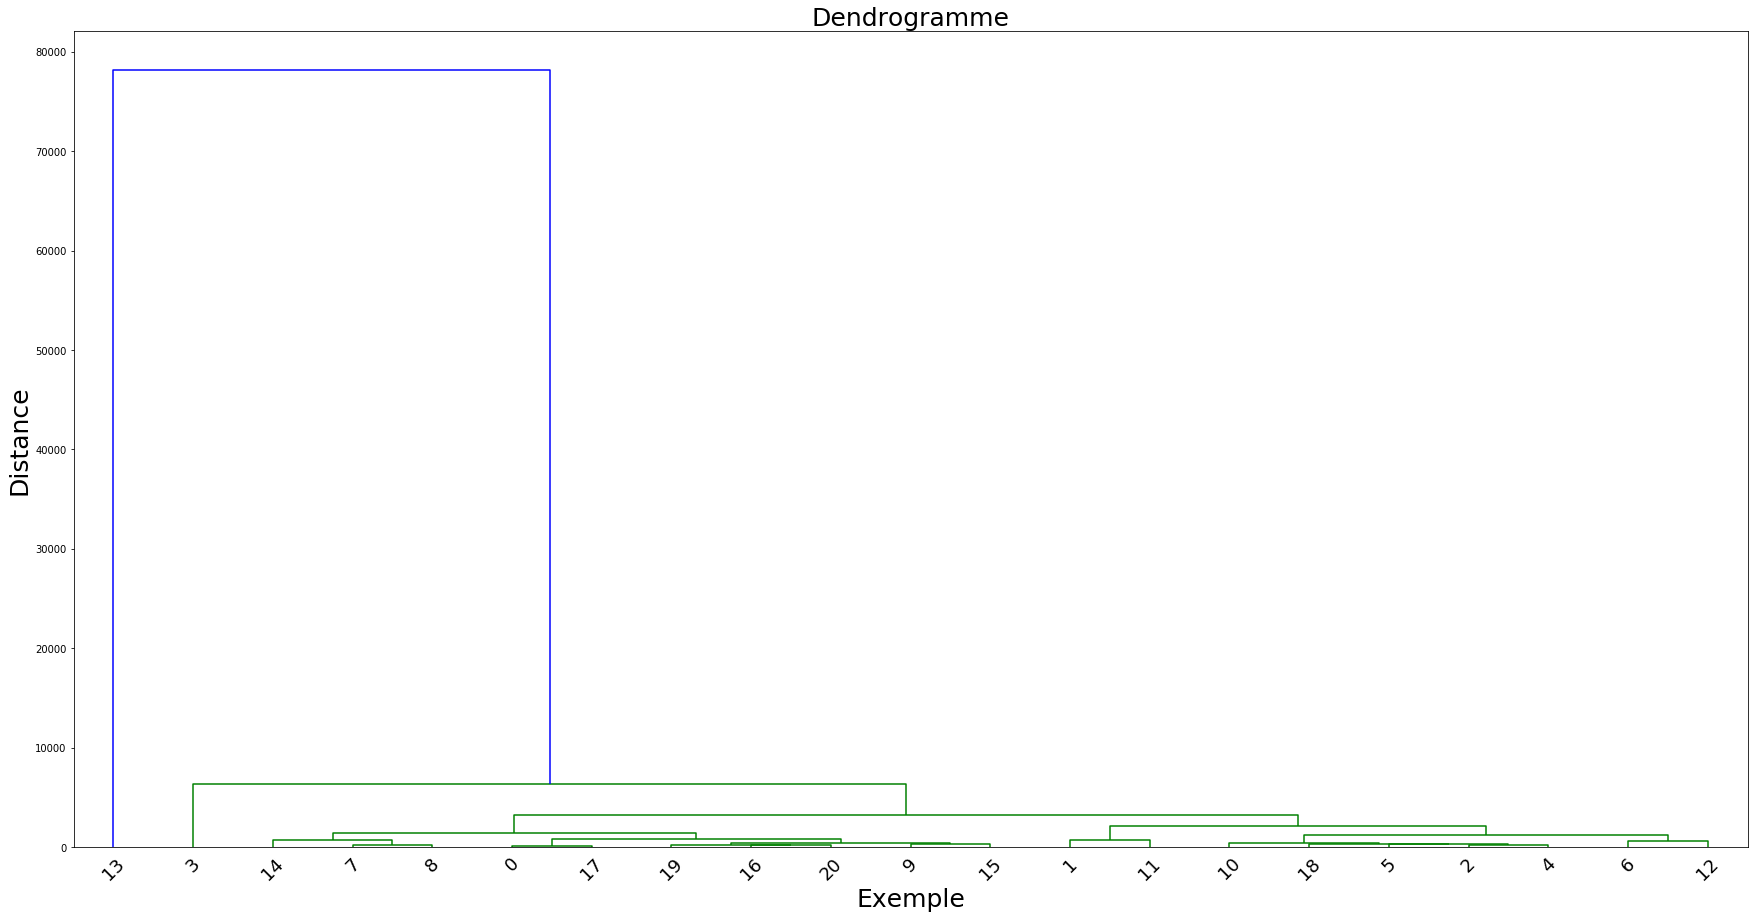

array([[0.00000000e+00, 1.70000000e+01, 1.19100000e+02, 2.00000000e+00],
       [7.00000000e+00, 8.00000000e+00, 1.52600000e+02, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 2.00400000e+02, 2.00000000e+00],
       [1.60000000e+01, 2.00000000e+01, 2.03300000e+02, 2.00000000e+00],
       [1.90000000e+01, 2.40000000e+01, 2.15550000e+02, 2.00000000e+00],
       [5.00000000e+00, 2.30000000e+01, 2.60700000e+02, 2.00000000e+00],
       [9.00000000e+00, 1.50000000e+01, 2.71200000e+02, 2.00000000e+00],
       [1.80000000e+01, 2.60000000e+01, 3.28633333e+02, 2.00000000e+00],
       [2.50000000e+01, 2.70000000e+01, 3.69766667e+02, 2.00000000e+00],
       [1.00000000e+01, 2.80000000e+01, 4.19725000e+02, 2.00000000e+00],
       [6.00000000e+00, 1.20000000e+01, 6.15500000e+02, 2.00000000e+00],
       [1.00000000e+00, 1.10000000e+01, 6.89800000e+02, 2.00000000e+00],
       [1.40000000e+01, 2.20000000e+01, 6.97400000e+02, 2.00000000e+00],
       [2.10000000e+01, 2.90000000e+01, 7.62610000e

In [40]:
clustering_hierarchique(parisVal, "manhattan")

## Questions de cours (à faire chez vous, sur papier)

Pour vous entraîner sans machine...

<font color="RED" size="+1">**[Q]**</font> Montrer que la distance de Manhattan est bien une mesure de distance.

<font color="RED" size="+1">**[Q]**</font> Dans le cours, 4 approches possibles ont été données afin de calculer la distance entre 2 groupes :
- l'approche du chaînage minimum est appelée "simple linkage"
- l'approche du chaînage maximum, est appelée "complete linkage"
- l'approche du chaînage moyenne est appelée "average linkage"
- l'approche du par centre de gravité est appelée "centroid linkage"

On considère une mesure de distance $d$. Soit $A =\{a_1,a_2,...,a_{|A|}\}$ et $B =\{b_1,b_2,...,b_{|B|}\}$ deux groupes d'exemples. Donner l'expression de la distance entre $A$ et $B$ pour chacune des approches.


<font color="RED" size="+1">**[Q]**</font> En utilisant la distance euclidienne et l'approche "centroid linkage", appliquer, "à la main", l'algorithme de clustering hiérarchique, méthode par agglomération, sur les données fournies sur le transparent 10 du cours 2 (coin haut gauche). Dans cette page, les données correspondent à 9 points dans un espace 2D: $X_1 \times X_2$. Le point 1 est le point de coordonnées $(-0.5, -1.0)$, etc. 
Construire le dendrogramme correspondant.

rem : dans la page du cours, les 3 premiers clusters construits sont donnés.


<font color="RED" size="+1">**[Q]**</font> *(examen 2018)*
On considère la base d'apprentissage de $[0,10]\times [0,10]$ contenant les 7 exemples suivants: $\mathcal{X}=\{(1,2)$, $(1,4)$, $(3,4)$, $(3,5)$, $(6,2)$, $(6,5)$, $(8,3)\}$ (remarque: cette base est déjà normalisée).
En détaillant les étapes et en expliquant les calculs réalisés et les regroupements effectués, appliquer sur $\mathcal{X}$ l'algorithme de classification hiérarchique, version ascendante, en utilisant l'approche ``centroid linkage'' et la distance euclidienne.  Donner le dendrogramme obtenu.
<font color="RED" size="+1">**[Q]**</font> Si on rajoute l'exemple $(5,5)$ dans $\mathcal{X}$ de la question précédente, sans ré-appliquer l'algorithme donner, en les justifiant, les modifications apportées au dendrogramme précédent par l'ajout de cet exemple.